In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#function that returns a predected value
def pred(m,x):
    return m*x+intercept

In [3]:
def create_data(slope,intercept):
    #Generating the data with the formula y=mx+c+noise
    #the input x consists of 100 random integers from 1 to 500
    x=np.random.randint(-100, 100, 100)
    #The data without noise, i.e., the line with slope and intercept
    line=np.array([pred(slope,i) for i in x])
    y=slope*x + intercept + np.random.normal(0,10,100)
    #plotting the data with the line that it is based on
    plt.figure()
    plt.title("Comparison of the data with the original line")
    plt.scatter(x,y,color='orange')
    plt.plot(x,line)
    plt.show()
    return x,y

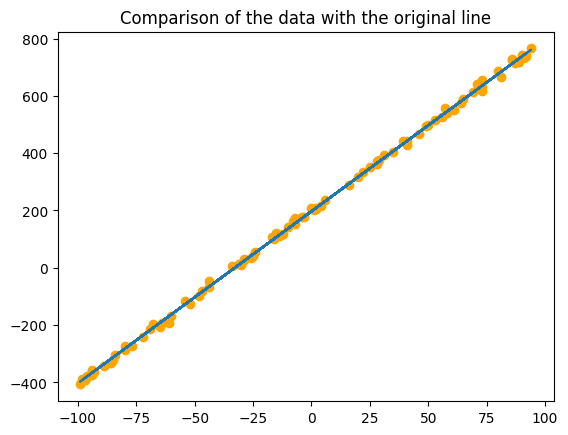

In [4]:
slope=6
intercept=197
x,y=create_data(slope,intercept)

In [5]:
def linear_search():
    #Different slope values from -100 to 100 with increments of 0.01
    m_values=np.linspace(-100,100,2001)
    error=[]
    start=time.time()
    #Performing linear search by checking the loss with every m value we have
    for m in m_values:
        #predicting the slope for every input data x that was generated
        y_pred = np.array([pred(m,i) for i in x])
        #calculating and storing the error
        error.append(np.mean((y-y_pred)**2))
    end=time.time()
    #printing the time taken to perform linear search
    print(end-start)
    #choosing the best m value
    print(m_values[np.argmin(error)],error[np.argmin(error)])
    #plotting the error space
    plt.figure()
    plt.title("The error value for each slope(m) calculated")
    plt.xlabel("M value")
    plt.ylabel("Error value")
    plt.plot(m_values,error)
    plt.show()
    return m_values[np.argmin(error)]

Linear Search
0.07078409194946289
6.0 84.36611475422366


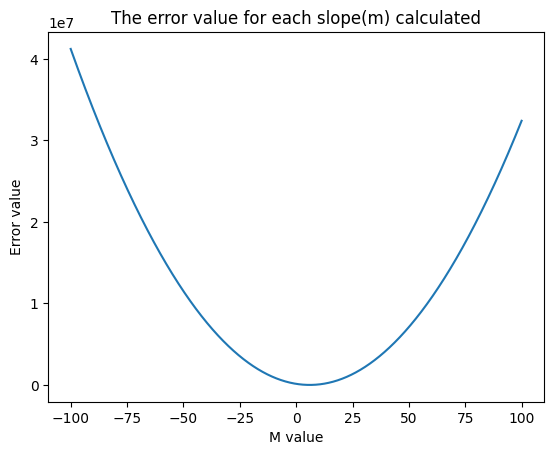

np.float64(6.0)

In [6]:
print("Linear Search")
linear_search()

In [7]:
def grad(m,x,y,alpha=0.00001,iterations=1000,diff=0.1):
    '''
    alpha --> learning rate
    iterations --> number of times to run gradient descent
    diff --> the value used to stop gradient descent, if the difference between the last two errors is less than diff, it breaks the loop
    '''
    m_values=[]
    error=[]
    start=time.time()
    #performing gradient descent for a 100 iterations
    for i in range(iterations):
        y_pred=np.array([pred(m,j) for j in x])
        grad=(-2)*(np.mean(x*(y-(m*x)-intercept)))
        m=m-alpha*(grad)
        m_values.append(m)
        error.append(np.mean((y-y_pred)**2))
        if i > 1 and abs(error[-1] - error[-2]) < diff:
            break
    end=time.time()
    #printing the time taken to perform gradient descent
    print(end-start)
    #printing the last m_value and error of gradient descent
    print(m_values[len(m_values)-1],error[len(error)-1])
    #plotting the error space
    plt.figure()
    plt.title("The error value for each slope(m) calculated")
    plt.xlabel("M value")
    plt.ylabel("Error value")
    plt.plot(m_values,error)
    plt.scatter(m_values,error,color='orange')
    plt.show()
    #plotting the error per iteration
    plt.figure()
    plt.title("Error vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Error value")
    plt.plot(range(i+1),error)
    plt.show()
    return m_values[len(m_values)-1]

Gradient Descent
Random M value: 17
0.0080718994140625
6.020039180124958 84.66888263052698


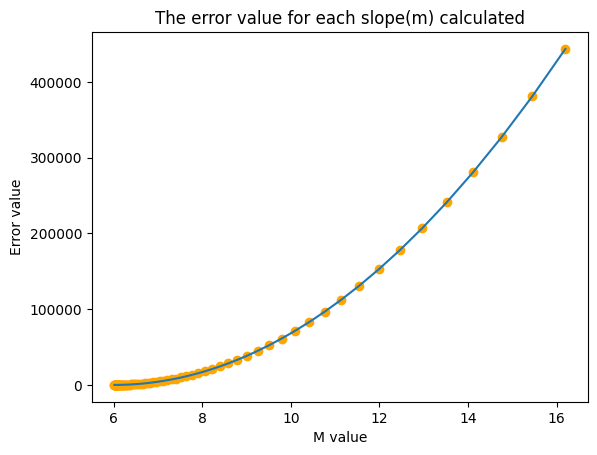

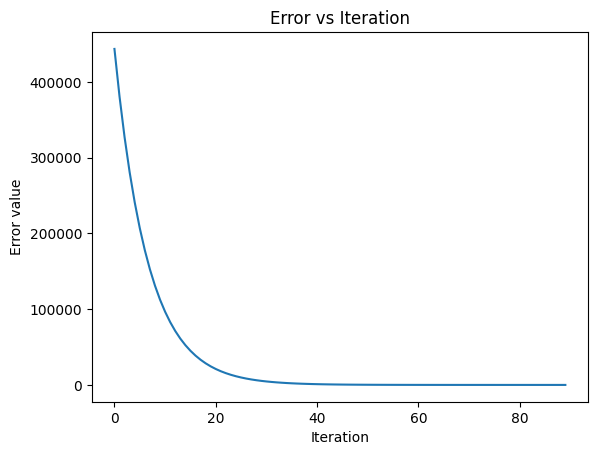

New slope(m) after Gradient Descent


In [8]:
print("Gradient Descent")
#choosing a random m value
m=np.random.randint(-100,100,1)[0]
print("Random M value:", m)
new_m=grad(m,x,y)
print("New slope(m) after Gradient Descent")